In [ ]:
!pip install tensorflow pandas scikit-learn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path ke file CSV di Google Drive
file_path = '/content/drive/MyDrive/capstone/dataset/pre_processed.csv'

# Baca dataset
df = pd.read_csv(file_path)

Mounted at /content/drive


In [ ]:
df.head()

,Unnamed: 0,Fever,Nasal Discharge,Loss of appetite,Weight Loss,Lameness,Breathing Difficulty,Swollen Lymph nodes,Lethargy,Depression,...,Hepatitis,Tetanus,Chronic kidney Disease,Diabetes,Gastrointestinal Disease,Allergies,Gingitivis,Cancers,Skin Rashes,Disease
0,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tick fever
1,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tick fever
2,2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tick fever
3,3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tick fever
4,4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tick fever


In [ ]:
# drop unused columns
data = df.drop(['Unnamed: 0', 'Disease'], axis=1)
# get data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23999 entries, 0 to 23998
Data columns (total 98 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Fever                              23999 non-null  float64
 1   Nasal Discharge                    23999 non-null  float64
 2   Loss of appetite                   23999 non-null  float64
 3   Weight Loss                        23999 non-null  float64
 4   Lameness                           23999 non-null  float64
 5   Breathing Difficulty               23999 non-null  float64
 6   Swollen Lymph nodes                23999 non-null  float64
 7   Lethargy                           23999 non-null  float64
 8   Depression                         23999 non-null  float64
 9   Coughing                           23999 non-null  float64
 10  Diarrhea                           23999 non-null  float64
 11  Seizures                           23999 non-null  flo

In [ ]:
# Encoding kolom target
le = LabelEncoder()
df['Disease'] = le.fit_transform(df['Disease'])

In [ ]:
# Pisahkan fitur dan target
X = data.drop(['Tick fever', 'Distemper', 'Parvovirus',
       'Hepatitis', 'Tetanus', 'Chronic kidney Disease', 'Diabetes',
       'Gastrointestinal Disease', 'Allergies', 'Gingitivis', 'Cancers',
       'Skin Rashes'], axis=1)
y = df['Disease']

In [ ]:
# Bagi dataset menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Inisialisasi model SVM
svm_model = SVC(kernel='linear', C=1.0)

# Latih model
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
# Evaluasi akurasi pada data pengujian
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Akurasi SVM: {accuracy_svm * 100:.2f}%')

Akurasi SVM: 99.85%


In [ ]:
# Model prediction menggunakan SVM
def predict_with_svm(symptoms):
    symptoms_encoded = le.transform(symptoms)
    return le.inverse_transform(svm_model.predict([symptoms_encoded]))[0]


In [ ]:
# Inisialisasi model Sequential untuk Neural Network
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(df['Disease'].unique()), activation='softmax'))

In [ ]:
# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Latih model NN
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=1)


Epoch 1/10
600/600 [==============================] - 5s 6ms/step - loss: 0.3828 - accuracy: 0.9470 - val_loss: 0.0119 - val_accuracy: 0.9990
Epoch 2/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0089 - accuracy: 0.9981 - val_loss: 0.0056 - val_accuracy: 0.9985
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0058 - accuracy: 0.9983 - val_loss: 0.0040 - val_accuracy: 0.9987
Epoch 4/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0049 - accuracy: 0.9981 - val_loss: 0.0036 - val_accuracy: 0.9990
Epoch 5/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0048 - accuracy: 0.9980 - val_loss: 0.0043 - val_accuracy: 0.9979
Epoch 6/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0043 - accuracy: 0.9983 - val_loss: 0.0055 - val_accuracy: 0.9977
Epoch 7/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0043 - accuracy: 0.9985 - val_loss: 0.0043 - val_accuracy: 0.9981
Epoch 

In [ ]:
# Evaluasi akurasi pada data pengujian
_, accuracy_nn = model.evaluate(X_test, y_test)
print(f'Akurasi Neural Network: {accuracy_nn * 100:.2f}%')


150/150 [==============================] - 0s 2ms/step - loss: 0.0087 - accuracy: 0.9973
Akurasi Neural Network: 99.73%


In [ ]:
# Model prediction menggunakan Neural Network
def predict_with_nn(symptoms):
    symptoms_encoded = le.transform(symptoms)
    return le.inverse_transform(model.predict_classes([symptoms_encoded]))[0]

In [ ]:
# Tampilkan model summary
print("Summary of SVM Model:")
print(svm_model)

print("\nSummary of Neural Network Model:")
model.summary()

Summary of SVM Model:
SVC(kernel='linear')

Summary of Neural Network Model:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                5568      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 12)                396       
                                                                 
Total params: 8044 (31.42 KB)
Trainable params: 8044 (31.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Prediksi dengan model SVM
svm_prediction = svm_model.predict(X_test)

# Prediksi dengan model Neural Network
nn_prediction_probs = model.predict(X_test)
nn_prediction = [round(prob.argmax()) for prob in nn_prediction_probs]

# Tampilkan hasil prediksi untuk beberapa contoh
for i in range(5):  # Ganti angka 5 dengan jumlah contoh yang ingin ditampilkan
    print(f"Contoh ke-{i+1}:")
    print(f"True Label: {y_test.iloc[i]}")

    # SVM Prediction
    print(f"SVM Prediction: {svm_prediction[i]}")

    # Neural Network Prediction
    print(f"NN Prediction: {nn_prediction[i]} (Probabilities: {nn_prediction_probs[i]})")
    print()


150/150 [==============================] - 0s 2ms/step
Contoh ke-1:
True Label: 4
SVM Prediction: 4
NN Prediction: 4 (Probabilities: [2.6479918e-07 1.4046484e-06 1.0402673e-08 2.3756086e-10 9.9999779e-01
 1.2602250e-08 9.4084435e-11 5.4860294e-07 1.6555806e-08 7.9540392e-09
 1.1055707e-09 2.5720162e-08])

Contoh ke-2:
True Label: 6
SVM Prediction: 6
NN Prediction: 6 (Probabilities: [5.78231019e-10 1.79772013e-11 1.84090843e-09 3.64073820e-08
 1.77872633e-14 7.91347077e-09 9.99999940e-01 5.72767311e-12
 2.16633449e-08 7.58726762e-12 1.40026835e-08 3.74043907e-10])

Contoh ke-3:
True Label: 0
SVM Prediction: 0
NN Prediction: 0 (Probabilities: [9.99999940e-01 1.82613365e-12 7.92161200e-16 5.43841816e-09
 6.11871248e-11 3.47245724e-13 1.03252018e-09 4.25312400e-13
 4.69617886e-11 1.25750725e-08 6.42247033e-10 4.75884393e-12])

Contoh ke-4:
True Label: 6
SVM Prediction: 6
NN Prediction: 6 (Probabilities: [1.4305644e-10 5.5289672e-11 2.6393243e-09 1.5479349e-08 2.8684954e-14
 5.1727929e-09 9

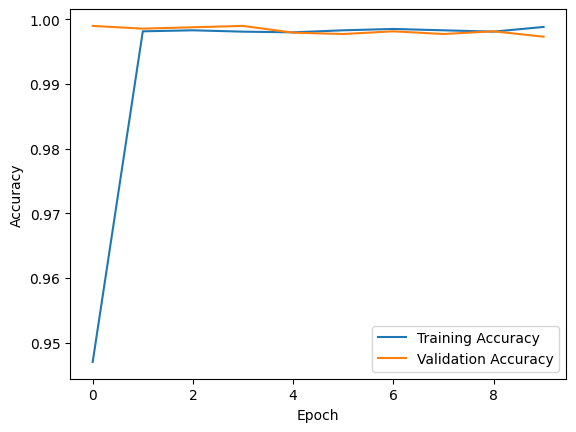

In [ ]:
# Tampilkan history pelatihan untuk Neural Network
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

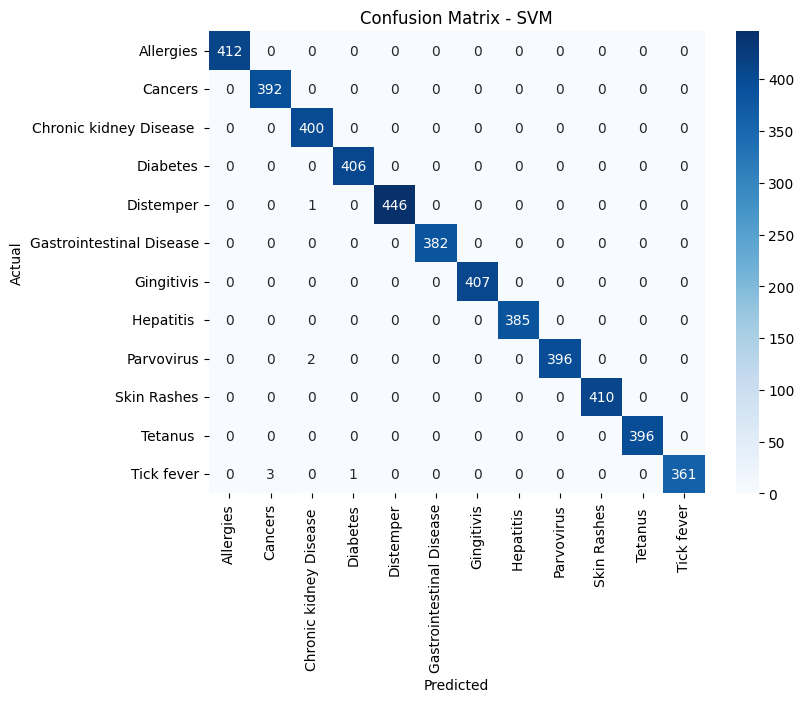

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix untuk SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

150/150 [==============================] - 0s 1ms/step


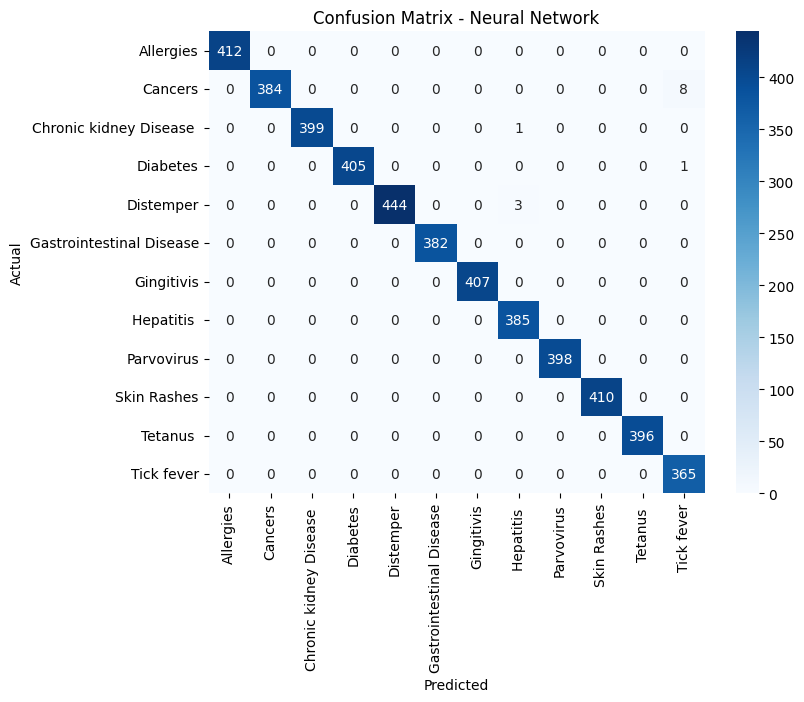

In [ ]:
# Confusion Matrix untuk Neural Network
y_pred_nn_prob = model.predict(X_test)
y_pred_nn = y_pred_nn_prob.argmax(axis=1)
cm_nn = confusion_matrix(y_test, y_pred_nn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - Neural Network')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
!pip install joblib

In [ ]:
import joblib

# Save SVM model
joblib.dump(svm_model, '/content/drive/MyDrive/capstone/svm_model.pkl')

# Save Neural Network model
model.save('/content/drive/MyDrive/capstone/nn_model.h5')

In [ ]:
!pip install tensorflowjs
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

!tensorflowjs_converter --input_format=keras {'/content/drive/MyDrive/capstone/nn_model.h5'} ./

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
2023-12-12 04:49:11.535603: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-12 04:49:11.626202: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-12 04:49:11.626284: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-12 04:49:11.628159: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-12 04:49:11.640602: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find 